Import data analysis module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud 
import seaborn as sns
import folium as folium
import matplotlib as mpl

Exploring Dataset

In [2]:
df_london = pd.read_csv('~/Downloads/PYTN041ONL/Dataset/london_crime_by_lsoa.csv')

In [3]:
df_london.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
df_london.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [5]:
df_london.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [6]:
df_london.tail(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
13490594,E01001706,Greenwich,Criminal Damage,Criminal Damage To Other Building,0,2008,2
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490597,E01000588,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [7]:
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [8]:
df_london.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [9]:
df_london.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603])

In [10]:
df_london.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [11]:
df_london['major_category'].value_counts()

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

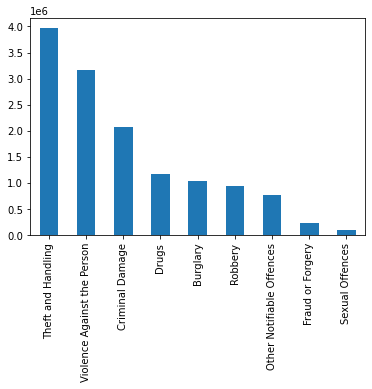

In [12]:
df_london.major_category.value_counts().plot.bar()

In [13]:
# Top 3 major category for London case is Theft and Handling, Violence against the person and Criminal Damage

In [14]:
df_london['minor_category'].value_counts()

Common Assault                            522180
Theft From Motor Vehicle                  522180
Other Theft                               522180
Harassment                                522072
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

In [15]:
df_london['borough'].value_counts()

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

In [16]:
# Top 3 area for the cases happenned: Croydon, Barnet, Ealing

In [17]:
df_london.shape

(13490604, 7)

In [18]:
df_london['lsoa_code'].value_counts()

E01001010    3456
E01004735    3456
E01001043    3456
E01003689    3456
E01003783    3456
             ... 
E01001101    1836
E01032775    1728
E01000001    1728
E01000002    1080
E01000003     648
Name: lsoa_code, Length: 4835, dtype: int64

In [19]:
df_london.loc

In [20]:
df_london.loc[df_london['borough'] == 'Croydon','minor_category'].value_counts()

Burglary in a Dwelling                    23760
Possession Of Drugs                       23760
Harassment                                23760
Other Criminal Damage                     23760
Theft/Taking Of Motor Vehicle             23760
Assault with Injury                       23760
Theft From Motor Vehicle                  23760
Burglary in Other Buildings               23760
Other Theft                               23760
Criminal Damage To Motor Vehicle          23760
Motor Vehicle Interference & Tampering    23760
Common Assault                            23760
Criminal Damage To Dwelling               23760
Other Notifiable                          23652
Personal Property                         23652
Other Theft Person                        23544
Wounding/GBH                              23436
Theft/Taking of Pedal Cycle               23004
Other violence                            22896
Criminal Damage To Other Building         22896
Drug Trafficking                        

In [21]:
df_london.loc[df_london['borough'] == 'Croydon','major_category'].value_counts()

Theft and Handling             176256
Violence Against the Person    143424
Criminal Damage                 94176
Drugs                           51948
Burglary                        47520
Robbery                         43740
Other Notifiable Offences       30564
Fraud or Forgery                 9396
Sexual Offences                  5076
Name: major_category, dtype: int64

In [22]:
df_london.loc[df_london['borough'] == 'Croydon','value'].sum()

260294

In [23]:
df_london.loc[df_london['major_category'] == 'Theft and Handling','value'].sum()

2661861

In [24]:
df_london[df_london['value'] == 1].value_counts()

lsoa_code  borough         major_category               minor_category               value  year  month
E01033746  Greenwich       Violence Against the Person  Wounding/GBH                 1      2016  10       1
E01001700  Greenwich       Criminal Damage              Other Criminal Damage        1      2015  3        1
                                                                                            2016  3        1
                                                                                                  9        1
                           Drugs                        Drug Trafficking             1      2008  2        1
                                                                                                          ..
E01003286  Lewisham        Theft and Handling           Theft From Motor Vehicle     1      2014  3        1
                                                                                                  5        1
                        

Visualizing Data using Matplotlib

In [25]:
london = df_london

In [26]:
london

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


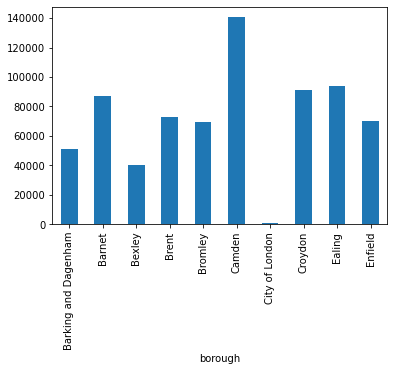

In [27]:
london[london['major_category'] == 'Theft and Handling'].groupby ('borough')['value'].sum().head(10).plot(kind="bar")

In [28]:
london[london['major_category'] == 'Theft and Handling'].groupby ('borough')['value'].sum().head(10)

borough
Barking and Dagenham     50999
Barnet                   87285
Bexley                   40071
Brent                    72523
Bromley                  69742
Camden                  140596
City of London             561
Croydon                  91437
Ealing                   93834
Enfield                  70371
Name: value, dtype: int64

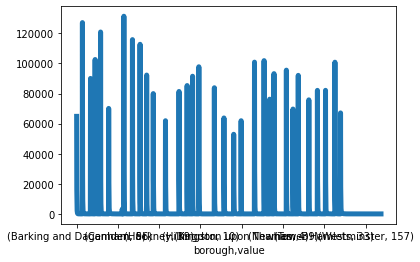

In [29]:
london[london['major_category'] == 'Theft and Handling'].groupby ('borough')['value'].value_counts().plot(linewidth=5)

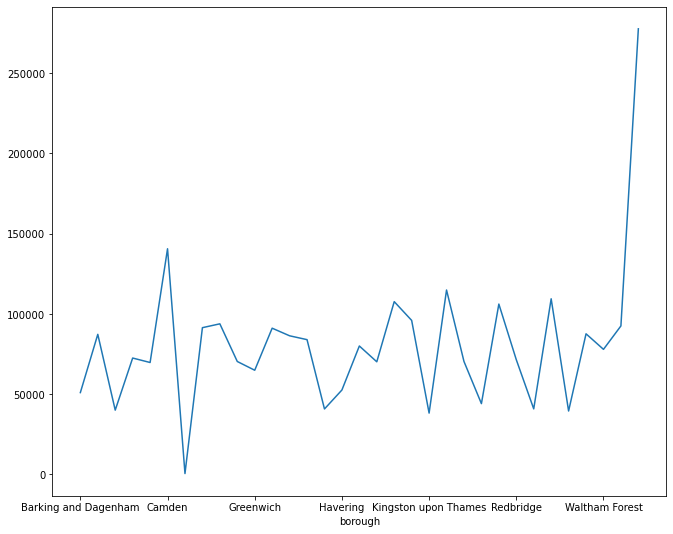

In [30]:
london[london['major_category'] == 'Theft and Handling'].groupby ('borough')['value'].sum().plot(figsize=(11,9))

In [31]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [32]:
df_london.shape

(13490604, 7)

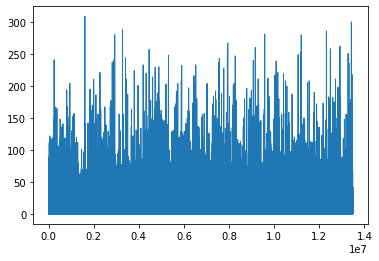

In [33]:
df_london ['value'].plot(linewidth=1)

In [34]:
df_london = df_london.set_index ('year')
df_london.head (5)

,lsoa_code,borough,major_category,minor_category,value,month
year,,,,,,
2016,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,11
2016,E01001646,Greenwich,Violence Against the Person,Other violence,0,11
2015,E01000677,Bromley,Violence Against the Person,Other violence,0,5
2016,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,3
2008,E01004563,Wandsworth,Robbery,Personal Property,0,6


In [35]:
london = pd.read_csv('~/Downloads/PYTN041ONL/Dataset/london_crime_by_lsoa.csv',index_col=0, parse_dates=True)

In [36]:
london.head()

,borough,major_category,minor_category,value,year,month
lsoa_code,,,,,,
E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Area Plot

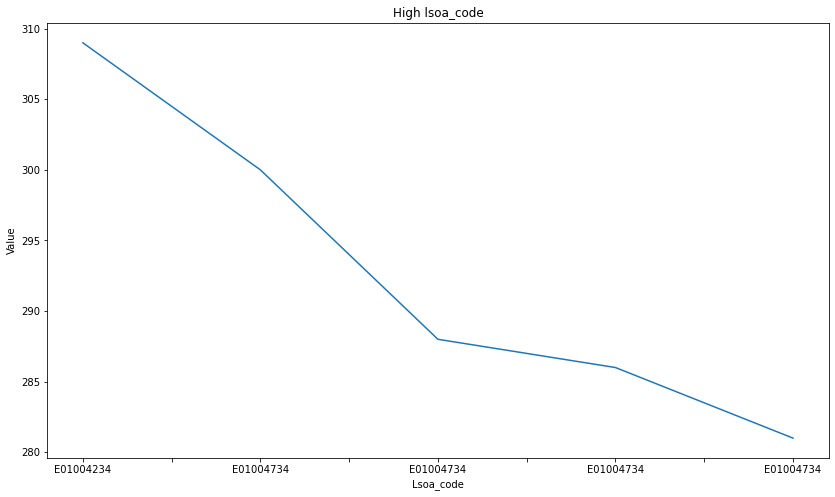

In [37]:
london.sort_values (by='value', ascending=False, axis=0, inplace=True)
london_top5 = london.head(5)
london_top5 = london_top5['value']
london_top5.plot(kind='line', figsize = (14, 8))


plt.title('High lsoa_code') # add a title to the area plot
plt.ylabel('Value') # add y-label
plt.xlabel('Lsoa_code') # add x-label

plt.show()

Histogram

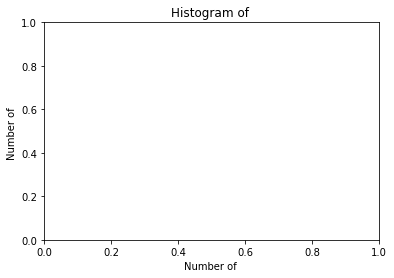

In [38]:
plt.title('Histogram of ') # add a title to the histogram
plt.ylabel('Number of ') # add y-label
plt.xlabel('Number of ') # add x-label

plt.show()

Bar Chart

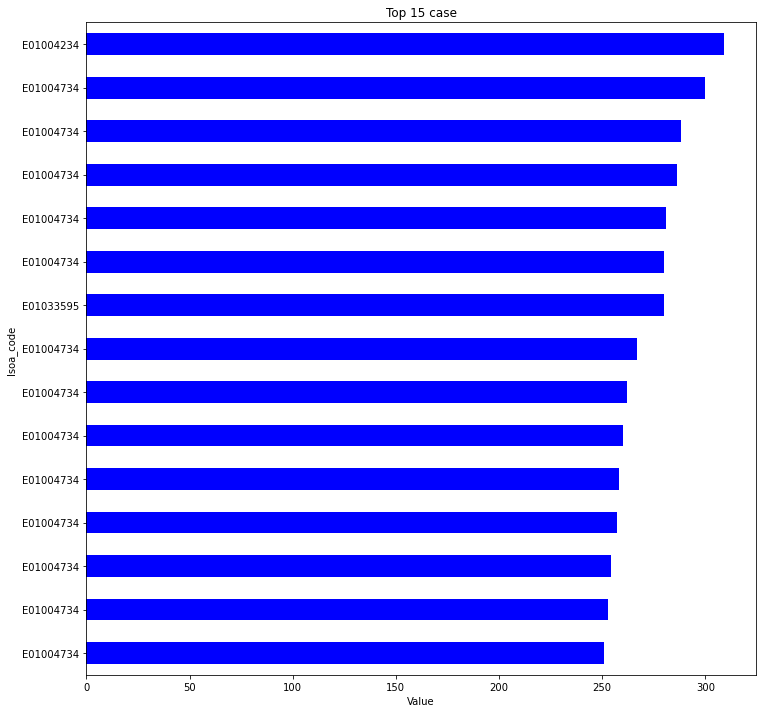

In [53]:
london.sort_values (by='value',ascending=True, inplace=True)
london_top15 = london['value'].tail(15)
london_top15

london_top15.plot (kind='barh', figsize =(12, 12), color = 'blue')
plt.xlabel('Value') # add to x-label to the plot
plt.ylabel('lsoa_code ') # add y-label to the plot
plt.title('Top 15 case') # add title to the plot

plt.show()

Pie Chart

In [ ]:
london_major = london.groupby('major_category', axis=0).max()
london_major

In [ ]:
london_minor = london.groupby('minor_category', axis=0).max()
london_minor